# A3

Given a bank customer, build a neural network-based classifier that can determine whether
they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.
5. Print the accuracy score and confusion matrix (5 points).


In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('churn.csv')

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# Step 2: Data preprocessing 
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], inplace=True)

In [6]:
df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Step 3: Prepare the feature set (X) and target set (y)
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [9]:
# Step 5: Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Step 9 (Optional): Try a different classifier (MLPClassifier from sklearn)
from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter=300)
nn_classifier.fit(X_train, y_train)
y_pred2 = nn_classifier.predict(X_test)

In [11]:
# Evaluate the sklearn model
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_sklearn = accuracy_score(y_test, y_pred2)
print("Sklearn Model Accuracy:", accuracy_sklearn)

Sklearn Model Accuracy: 0.8616


<Axes: >

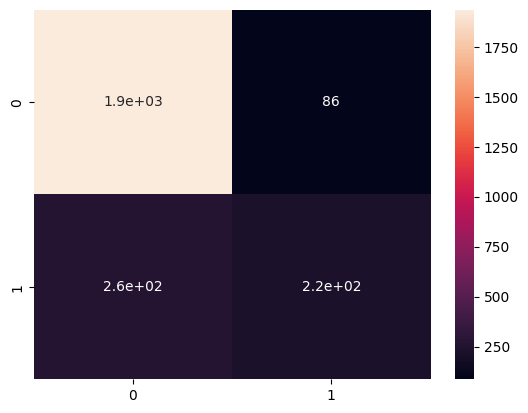

In [12]:
# Display confusion matrix for sklearn model
cm_sklearn = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm_sklearn, annot=True)

Explanation of Important Concepts:
Data Normalization: It transforms features to have a mean of 0 and a variance of 1, which helps neural networks converge faster and improves performance.

MLP Classifier: This is a type of feedforward artificial neural network where:

hidden_layer_sizes: Defines the number of neurons in the hidden layers. You can experiment with this to improve model performance.
activation: Specifies the activation function, with 'logistic' indicating a logistic sigmoid function.
max_iter: The maximum number of iterations for the optimization algorithm.
Confusion Matrix: A table used to evaluate the performance of a classification algorithm, showing true positives, true negatives, false positives, and false negatives.

Here's a concise theory overview of the confusion matrix, including its components, importance, and how to interpret it.

### Confusion Matrix Overview

#### Definition
A confusion matrix is a table used to evaluate the performance of a classification algorithm. It summarizes the prediction results on a classification problem, providing a comprehensive view of how well the model is performing.

#### Components of the Confusion Matrix
For a binary classification problem, the confusion matrix typically has four components:

1. **True Positives (TP)**:
   - The number of instances correctly predicted as positive.
   
2. **True Negatives (TN)**:
   - The number of instances correctly predicted as negative.

3. **False Positives (FP)**:
   - The number of instances incorrectly predicted as positive (Type I error).

4. **False Negatives (FN)**:
   - The number of instances incorrectly predicted as negative (Type II error).

#### Structure
The confusion matrix can be represented as follows:

|                  | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| **Actual Positive** | True Positives (TP)   | False Negatives (FN)  |
| **Actual Negative** | False Positives (FP)  | True Negatives (TN)   |

#### Importance of the Confusion Matrix
- **Performance Measurement**: It provides a detailed breakdown of how the classifier is performing, helping to identify not only the accuracy but also where the model is making mistakes.
- **Insight into Class Imbalance**: It helps to reveal whether the model is biased towards one class, especially in imbalanced datasets.
- **Calculation of Other Metrics**: From the confusion matrix, other performance metrics can be derived, such as:
  - **Accuracy**: \((TP + TN) / (TP + TN + FP + FN)\)
  - **Precision**: \(TP / (TP + FP)\) (also known as Positive Predictive Value)
  - **Recall (Sensitivity)**: \(TP / (TP + FN)\) (also known as True Positive Rate)
  - **F1 Score**: The harmonic mean of precision and recall, given by \(2 \times (Precision \times Recall) / (Precision + Recall)\)
  - **Specificity**: \(TN / (TN + FP)\) (True Negative Rate)

#### Interpretation
- A high number of TP indicates that the model correctly identifies positive instances.
- A high number of TN indicates that the model correctly identifies negative instances.
- A high number of FP suggests that the model is incorrectly classifying negative instances as positive, which may be problematic depending on the context (e.g., predicting diseases).
- A high number of FN indicates that the model is failing to identify positive instances, which could also be critical (e.g., missing potential churners in a bank).

#### Visualization
- Confusion matrices can be visualized using heatmaps, making it easier to identify areas of misclassification and overall performance visually.

### Conclusion
The confusion matrix is a fundamental tool in the evaluation of classification models. It provides insights into both the strengths and weaknesses of a model, guiding improvements and helping to understand the model's behavior in detail.